<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/VisualizingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTS:

In [1]:
import numpy as np
import tensorflow as tf
import random
import math
from matplotlib import pyplot as plt

Creating the data:

In [2]:
x = np.array([[random.random()*100+20, random.random()*-100+20, random.random()*10-10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*100-120, random.random()*-100-120, random.random()*50+10, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 9)
(20000,)
[[ 2.81262089e+01 -2.98068415e+01 -3.77354659e+00 ...  2.27992717e-01
   3.00000000e+00 -8.78380161e-01]
 [ 5.03531748e+01 -5.14143240e+01 -1.04500935e+00 ...  4.15993352e-01
   3.00000000e+00 -7.80120476e-02]
 [ 7.07992140e+01 -3.03445578e+01 -9.71544442e+00 ...  4.06398211e-02
   3.00000000e+00 -2.18052082e-01]
 ...
 [-6.53117383e+01 -1.94957528e+02  4.61568282e+01 ...  4.57982501e-01
   3.00000000e+00  1.67877610e+00]
 [-6.18636832e+01 -1.41878471e+02  4.65170024e+01 ...  9.73213457e-01
   3.00000000e+00  1.28396212e+00]
 [-1.14512384e+02 -1.82483789e+02  4.48002087e+01 ...  9.33792847e-01
   3.00000000e+00  1.21729599e+00]]


## MODEL:

In [3]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(5, activation='sigmoid'),
                                    tf.keras.layers.Dense(2, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=50, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 7.2351e-06 - accuracy: 1.0000


[7.235102202685084e-06, 1.0]

## CREATING INDIVIDUAL BASIS CLASS:

In [4]:
class NueralNetVisualizer:
  def __init__(self, X, model):
    self.X = X
    self.model = model
    self.layer_wise_output_values = None
    self.model_weights = model.get_weights()
    self.activations = None
    self.img = None
  
  def layer_wise_output(self):
    x = self.X
    output_names = [l.name for l in self.model.layers]
    self.model.outputs = [l.output for l in self.model.layers]
    self.model.build(input_shape=(x.shape[0],))
    output_values = self.model(np.array([x]))
    layer_name_to_output_value = dict(zip(output_names, output_values))
    
    self.layer_wise_output_values = [x]
    for key, item in layer_name_to_output_value.items():
      self.layer_wise_output_values.append(np.array(item[0]))

  def scoring_neurons_layerwise(self, layer_index):
    input = self.layer_wise_output_values[layer_index]
    weight = self.model_weights[layer_index*2]
    bias = self.model_weights[layer_index*2+1]
    output = self.layer_wise_output_values[layer_index+1]
    importance = []
    for index in range(weight.shape[1]):
      strengths = np.abs(input * weight.T[index] - bias[index])
      strengths = strengths
      strengths = strengths/np.sum(strengths)
      importance.append(strengths)
    importance = np.array(importance)
    neuron_scores = np.mean(importance, axis=0)
    return neuron_scores
  
  def image_initializer(self):
    layers_len = len(self.layer_wise_output_values)
    max_neurons = max([layer.shape[0] for layer in self.layer_wise_output_values])
    return np.full((layers_len, max_neurons), -1.0)
    
  def add_to_image(self, neuron_scores, layer_index):
    right = (self.img.shape[1] - neuron_scores.shape[0])//2
    left = self.img.shape[1] - right -  neuron_scores.shape[0]
    img_row = np.array([-1.0 for _ in range(right)] + [val for val in neuron_scores] + [-1.0 for _ in range(left)])
    self.img[layer_index] = img_row    

  def draw_image(self):
    fig, ax = plt.subplots()
    cmap = plt.cm.viridis
    cmap.set_under(color='black')  
    ax.imshow(self.img, vmin=-0.01, vmax=1, cmap=cmap)
    for i in range(self.img.shape[0]):
        for j in range(self.img.shape[1]):
            ax.text(j, i, "{:.2f}".format(self.img[i,j]), ha="center", va="center")

  def iterating_through_layers(self):
    self.layer_wise_output()
    self.img = self.image_initializer()
    self.draw_image()
    for layer_index in range(len(self.model_weights)//2):
      neuron_scores = self.scoring_neurons_layerwise(layer_index)
      self.add_to_image(neuron_scores, layer_index)
      self.draw_image()
      plt.pause(0.01)
    output = self.layer_wise_output_values[layer_index+1]
    output = np.abs(output)
    output = output/np.sum(output)
    self.add_to_image(output, layer_index+1)
    self.draw_image()
    plt.pause(0.01)
    plt.show()

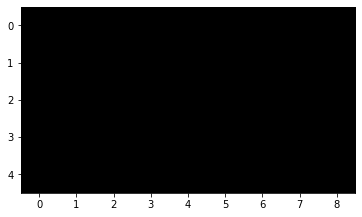

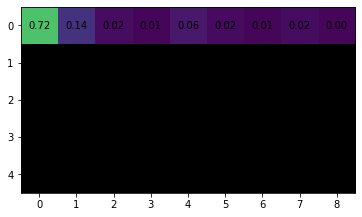

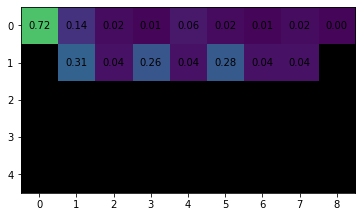

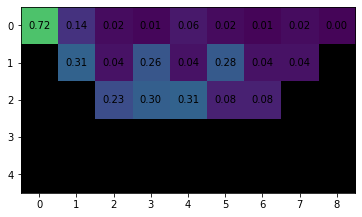

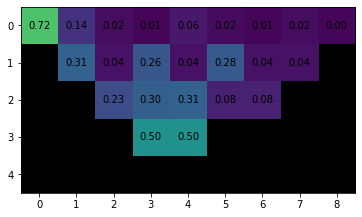

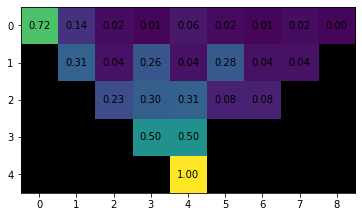

In [5]:
nnv = NueralNetVisualizer(x[1], model)
nnv.iterating_through_layers()

## LET US TAKE A LOOK AT ANOTHER EXAMPLE:

In [6]:
x = np.array([[random.random()*100+200, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()-1] for _ in range(10000)] + [[random.random()*-100-220, random.random(), 10, random.random()*10-10, random.random(), 3, random.random()+1] for _ in range(10000)])
y = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

print(x.shape)
print(y.shape)

print(x)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

(20000, 7)
(20000,)
[[ 2.41536786e+02  9.42288148e-01  1.00000000e+01 ...  1.78487125e-01
   3.00000000e+00 -4.14948178e-01]
 [ 2.72283490e+02  8.25584737e-01  1.00000000e+01 ...  4.26825371e-02
   3.00000000e+00 -4.93757922e-01]
 [ 2.20172216e+02  1.23307416e-01  1.00000000e+01 ...  3.95675962e-01
   3.00000000e+00 -9.02439791e-01]
 ...
 [-2.78737287e+02  2.30120953e-01  1.00000000e+01 ...  8.13706427e-01
   3.00000000e+00  1.26166345e+00]
 [-2.49868222e+02  6.80046754e-01  1.00000000e+01 ...  3.11227170e-01
   3.00000000e+00  1.86446867e+00]
 [-2.61622613e+02  1.53822056e-01  1.00000000e+01 ...  9.41869384e-01
   3.00000000e+00  1.09246939e+00]]


In [7]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(x.shape[1],)),
                                    tf.keras.layers.Dense(3, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=100, validation_split=0.2, verbose=0)
model.evaluate(x, y)

625/625 [==============================] - 1s 1ms/step - loss: 1.8565e-08 - accuracy: 1.0000


[1.856472486849725e-08, 1.0]

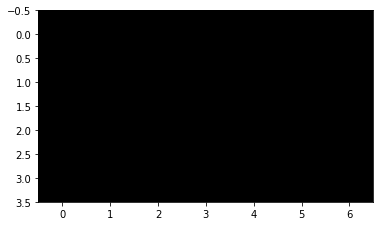

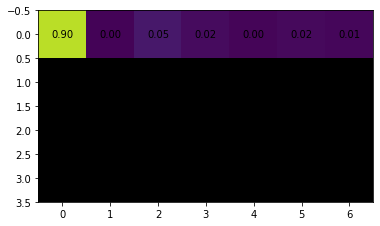

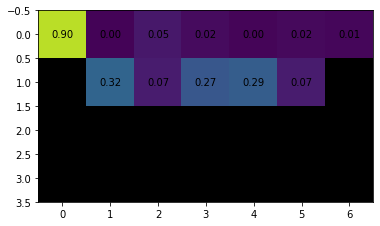

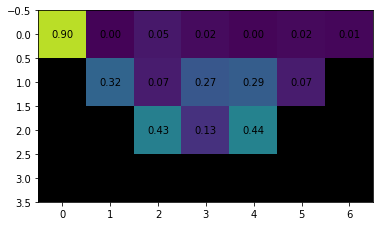

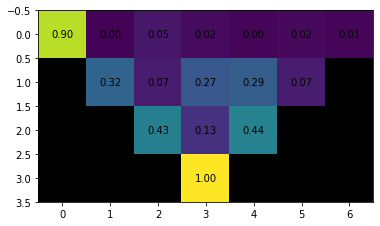

In [8]:
nnv = NueralNetVisualizer(x[0], model)
nnv.iterating_through_layers()

TRYING A DIFFERENT KIND OF DATASET:

In [9]:
random.seed(0)
x = np.array([[random.random()*10, random.randint(1, 6), random.random()*5-5] for _ in range(500)] + [[random.random()*0+10, random.randint(-10, -6), random.random()*5-15] for _ in range(500)] + [[random.random()*100+500, random.randint(1, 6), random.random()*50-5] for _ in range(500)] + [[random.random()*-10, random.randint(1, 16), random.random()*5-54] for _ in range(500)] + [[random.random()*-10+600, random.randint(-100, 60), random.random()*205-5] for _ in range(500)] + [[random.random()*10, random.randint(1, 6), random.random()*5-500] for _ in range(500)] + [[random.random()*0, random.randint(100, 601), random.random()*5-5] for _ in range(500)])
y = np.array([[1, 0, 0, 0, 0, 0, 0] for _ in range(500)] + [[0, 1, 0, 0, 0, 0, 0] for _ in range(500)] + [[0, 0, 1, 0, 0, 0, 0] for _ in range(500)] + [[0, 0, 0, 1, 0, 0, 0] for _ in range(500)] + [[0, 0, 0, 0, 1, 0, 0] for _ in range(500)] + [[0, 0, 0, 0, 0, 1, 0] for _ in range(500)] + [[0, 0, 0, 0, 0, 0, 1] for _ in range(500)])

print('x', x.shape)
print('y', y.shape)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

x (3500, 3)
y (3500, 7)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='sigmoid', input_shape=(3,)),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x, y, epochs=500, validation_split=0.2, verbose=0)

In [11]:
model.evaluate(x, y)

110/110 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9454


[0.11655141413211823, 0.9454285502433777]

CHECKING EACH CATEGORY:

In [12]:
x0 = np.array([i for i,j in zip(x, y) if j[0]==1][0])
x1 = np.array([i for i,j in zip(x, y) if j[1]==1][0])
x2 = np.array([i for i,j in zip(x, y) if j[2]==1][0])
x3 = np.array([i for i,j in zip(x, y) if j[3]==1][0])
x4 = np.array([i for i,j in zip(x, y) if j[4]==1][0])
x5 = np.array([i for i,j in zip(x, y) if j[5]==1][0])
x6 = np.array([i for i,j in zip(x, y) if j[6]==1][0])

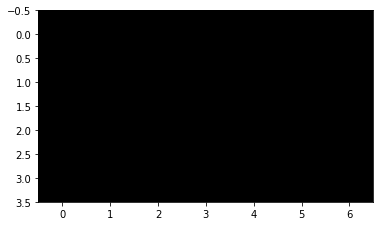

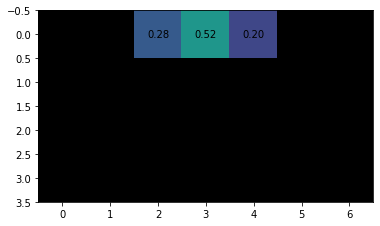

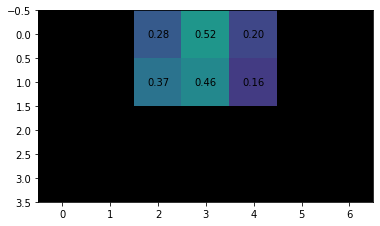

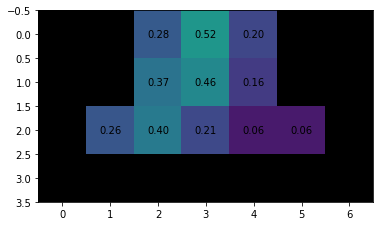

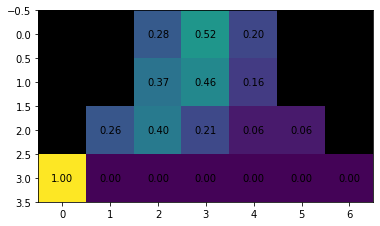

In [13]:
nnv = NueralNetVisualizer(x0, model)
nnv.iterating_through_layers()

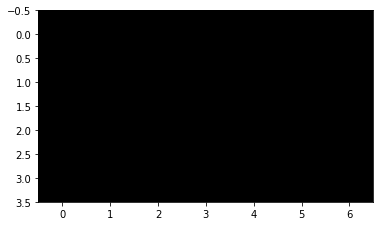

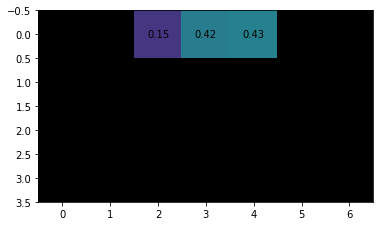

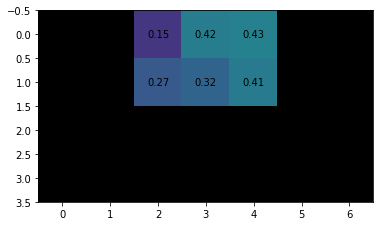

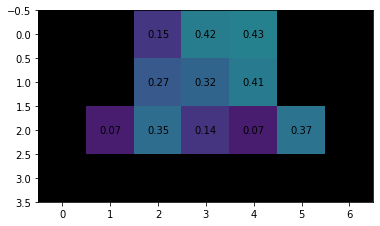

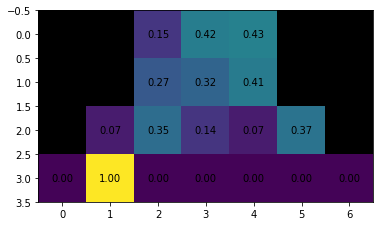

In [14]:
nnv = NueralNetVisualizer(x1, model)
nnv.iterating_through_layers()

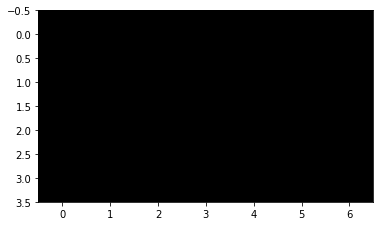

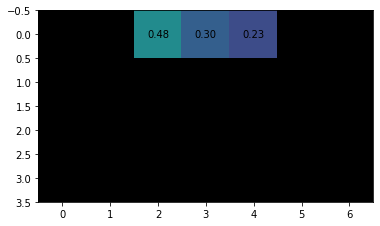

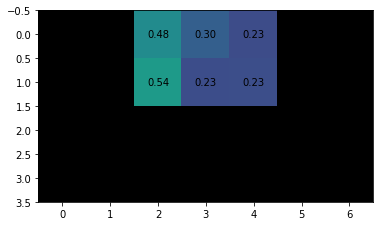

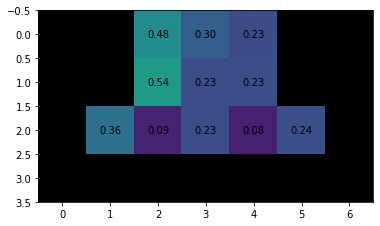

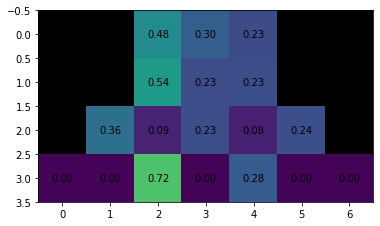

In [15]:
nnv = NueralNetVisualizer(x2, model)
nnv.iterating_through_layers()

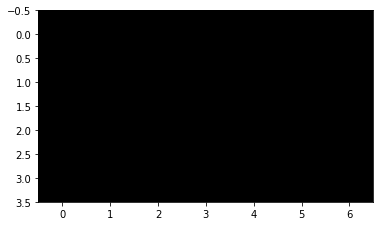

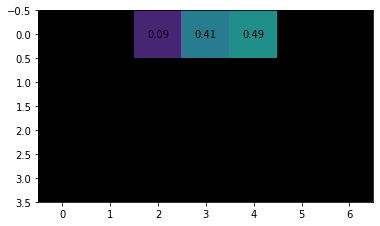

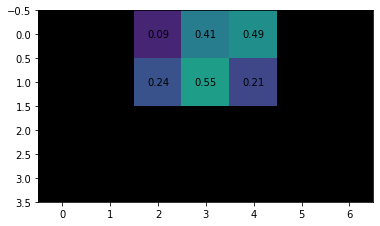

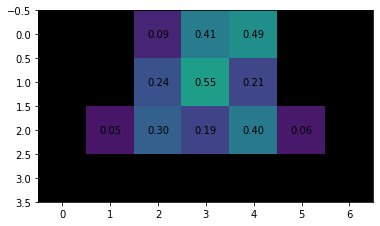

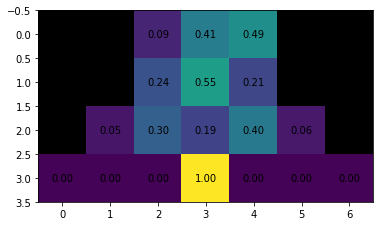

In [16]:
nnv = NueralNetVisualizer(x3, model)
nnv.iterating_through_layers()

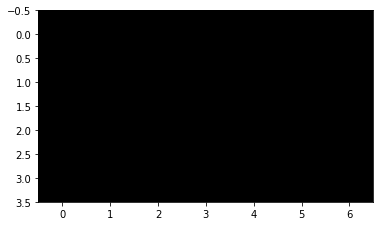

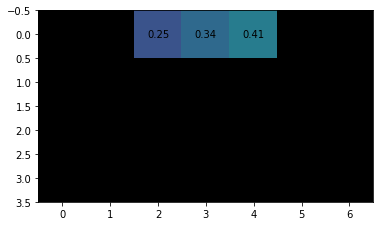

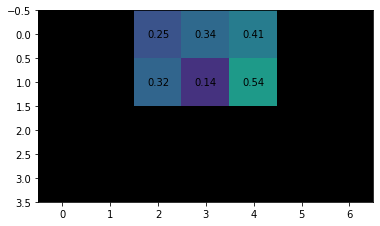

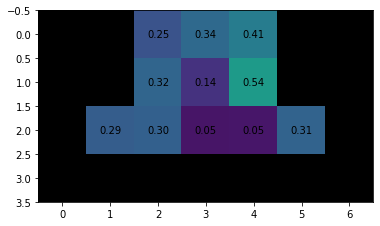

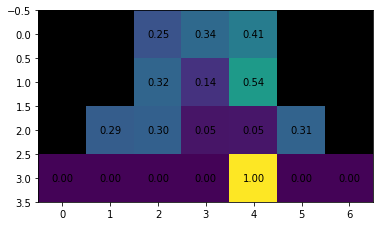

In [17]:
nnv = NueralNetVisualizer(x4, model)
nnv.iterating_through_layers()

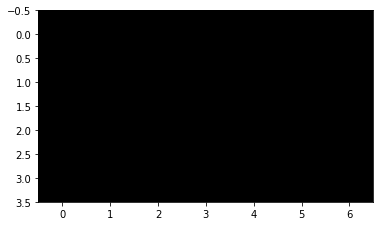

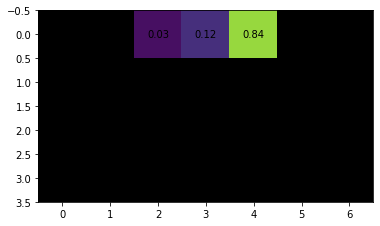

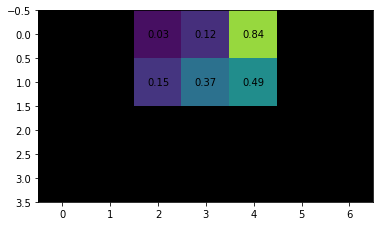

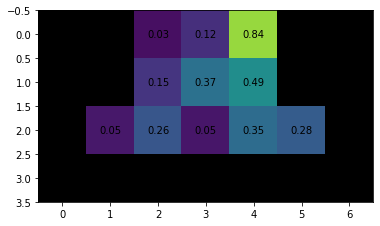

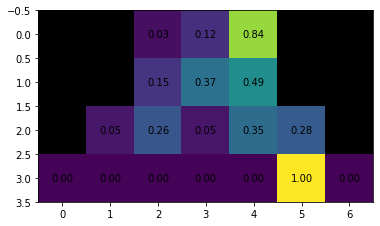

In [18]:
nnv = NueralNetVisualizer(x5, model)
nnv.iterating_through_layers()

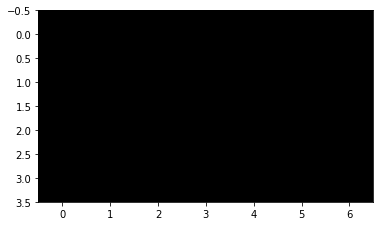

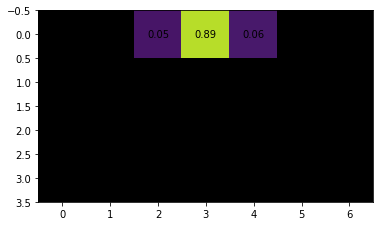

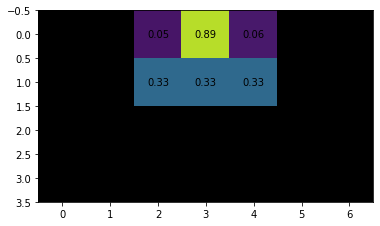

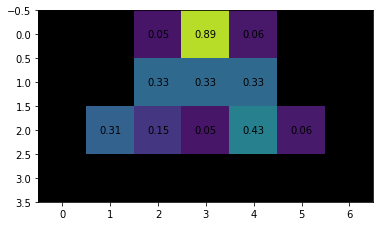

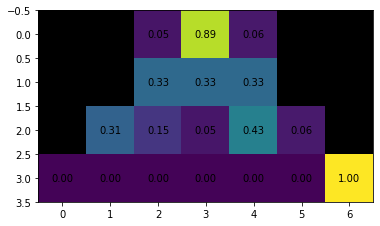

In [19]:
nnv = NueralNetVisualizer(x6, model)
nnv.iterating_through_layers()

#### THIS CLEARLY HIGHLIGHTS HOW INFORMATION IS BEING PASSED FROM LAYER TO ANOTHER IN A NEURAL NETWORK. A BETTER UNDERSTANDING WILL DEFINITELY COME FROM THE PATHS FOLLOWED AS WELL. HOWEVER, AS A METHOD OF VISUALISATION, I FOUND IT UNSUITABLE AS WEIGHTS CAN FORM LARGE MATRICES, TAKE INTO EXAMPLE THE PASSGE FROM LAYER 3 TO LAYER 4 (LAST LAYER), THE WEIGHT MATRIX ITSELF HAS 5 X 7 PATHS TO FOLLOW MAKING IT 35. TO PLOT AND DRAW SO MANY PATHS WILL LEAD TO AN EXCESS OF DATA. WHICH CAN BOGGLE US, SO TO KEEP THINGS CLEAR I HAVE ONLY TAKEN INTO ACCOUNT THE NEURONS IN THE PICTURE.

##### Also if anyone knows how to make plt.pause() work in google colab, it will be really helpful. Right now, it generates multiple images, which makes it look bad. Because on localhost I am able to develop it as a gif. But up here, it splits making multiple images and then it does not display in GitHub, so it looks bad. Annoying :(